# Step 1: Load the Dataset

## Overview  
Before we start with data exploration and preprocessing, we need to load the dataset into a Pandas DataFrame.  
The dataset may be located in a local directory or in a Kaggle environment.  
This step ensures that the dataset is successfully loaded and ready for further analysis.  

## Code to Load the Dataset  
Use the following Python function to load the dataset from a given file path:  

In [1]:
import os
import pandas as pd

def load_dataset(file_path):
    """
    Load a dataset from a given CSV file path and provide feedback.

    Parameters:
    - file_path (str): Path to the dataset CSV file.

    Returns:
    - pd.DataFrame: Loaded dataset if successful, else None.
    """
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return None

    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Example usage:
df = load_dataset("data.csv")

Dataset loaded successfully. Shape: (569, 33)


# **Subgoal 2: Data Exploration**  

## **Overview**  
Before selecting the most important features, we need to explore the dataset to understand its structure, distributions, and potential issues. This step helps ensure that the data is clean and ready for feature selection and modeling.  

## **Key Objectives**  
✅ Check dataset structure and feature types.  
✅ Identify and handle missing values.  
✅ Analyze target variable distribution.  
✅ Detect outliers and visualize feature distributions.  
✅ Examine correlations between features.  


## **1️⃣ Basic Dataset Information**  
- Understand dataset shape, column names, and data types.  
- Identify categorical and numerical features. 

In [2]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())



Dataset Shape: (569, 33)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null   

In [3]:
# Display the first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **2️⃣ Handling Missing Values**  
- Check for missing data and decide whether to drop, fill, or interpolate values.  
- Use visualizations to detect missing patterns.  


In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())



Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

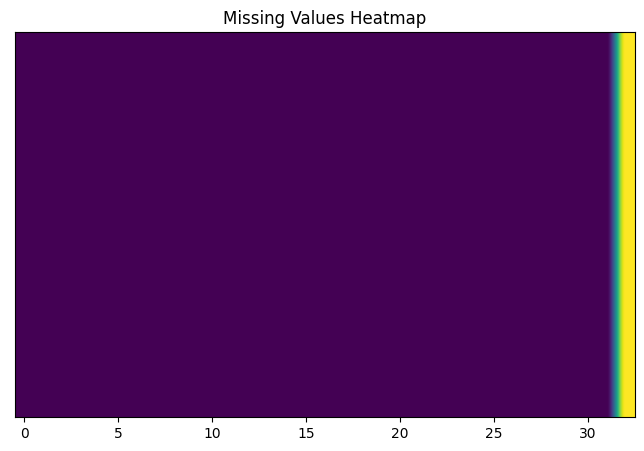

In [5]:
# Visualize missing data using just matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')
plt.title("Missing Values Heatmap")
plt.yticks([])
plt.show()

In [6]:
# Drop the 'Unnamed: 32' column if it exists
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

In [7]:
df.isnull().sum().sum()

0

## **3️⃣ Statistical Summary of Features**  
- Examine feature distributions using **mean, median, min, max, and standard deviation**.  
- Identify skewness and outliers.  


In [8]:
# Import necessary libraries
import numpy as np

# Compute skewness for numerical columns
skewness = df.skew().sort_values(ascending=False)

# Display skewness values
print("Feature Skewness:\n", skewness)

Feature Skewness:
 id                         6.473752
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_w

/tmp/ipykernel_8128/1281564164.py:5: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew().sort_values(ascending=False)


In [9]:
                                                                                                                                         # Summary statistics
df.describe()                                                                                                                                                                                                                   

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


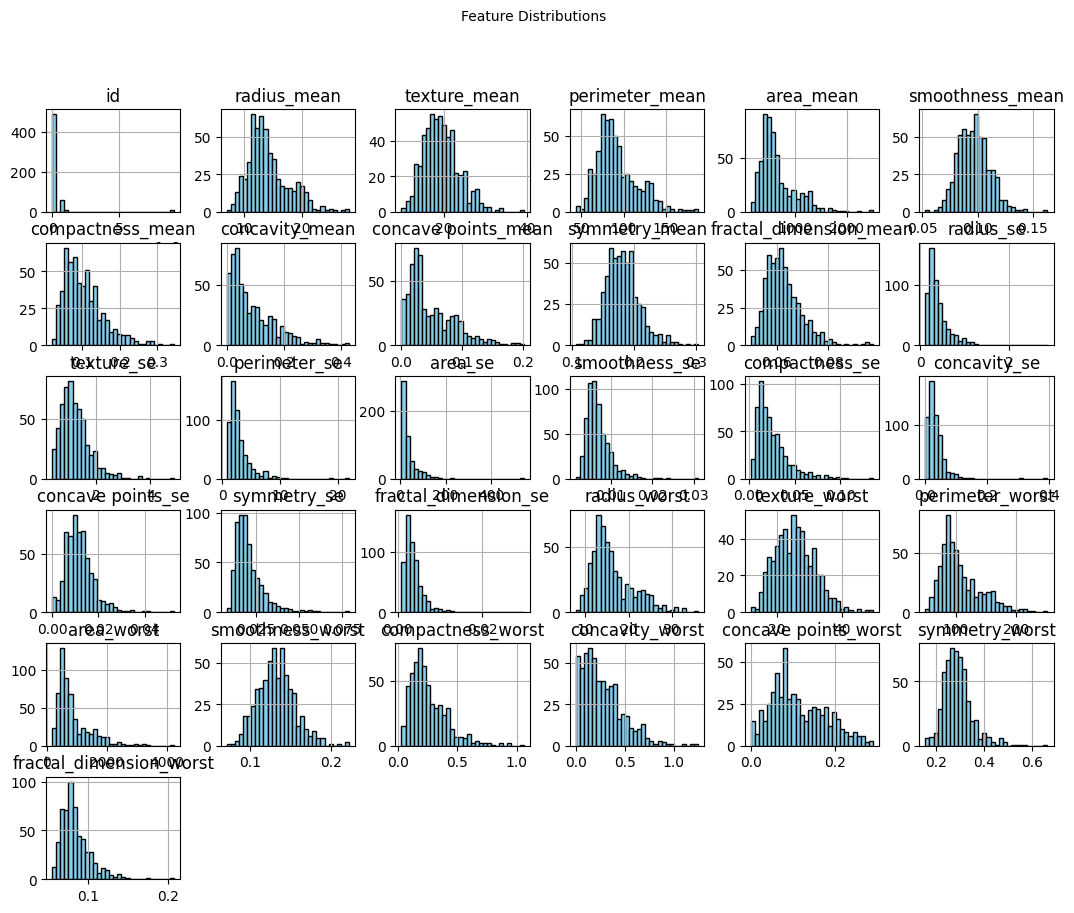

In [17]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(13, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=10)
plt.show()

## **4️⃣ Class Distribution of Target Variable**  
- Analyze whether the dataset is **balanced or imbalanced**.  
- If necessary, plan to use sampling techniques or adjust evaluation metrics. 

In [18]:
# Check class distribution
print(df['diagnosis'].value_counts())

# Check class distribution percentage
print(df['diagnosis'].value_counts(normalize=True) * 100)

B    357
M    212
Name: diagnosis, dtype: int64
B    62.741652
M    37.258348
Name: diagnosis, dtype: float64


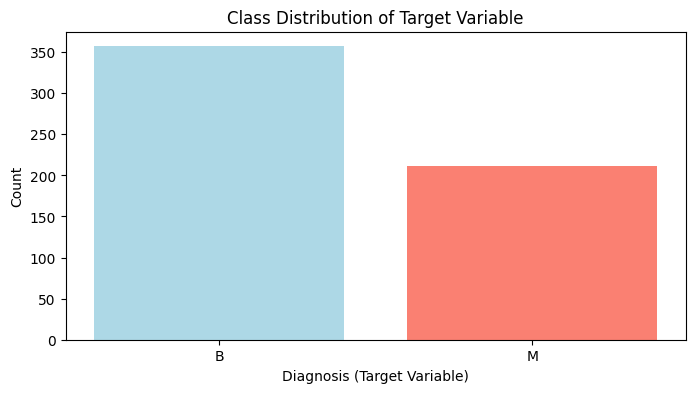

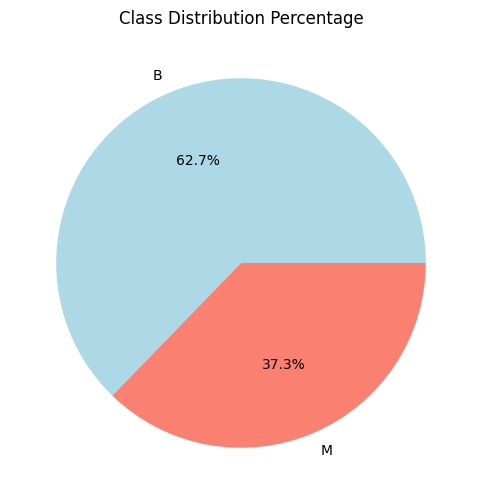

In [19]:
import matplotlib.pyplot as plt

# Get class counts
class_counts = df['diagnosis'].value_counts()

# Bar chart
plt.figure(figsize=(8, 4))
plt.bar(class_counts.index, class_counts.values, color=['lightblue', 'salmon'])
plt.xlabel("Diagnosis (Target Variable)")
plt.ylabel("Count")
plt.title("Class Distribution of Target Variable")
plt.show()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Class Distribution Percentage")
plt.show()



## **5️⃣ Feature Distributions & Outlier Detection**  
- Visualize the distribution of numerical features using histograms.  
- Identify outliers using box plots.  


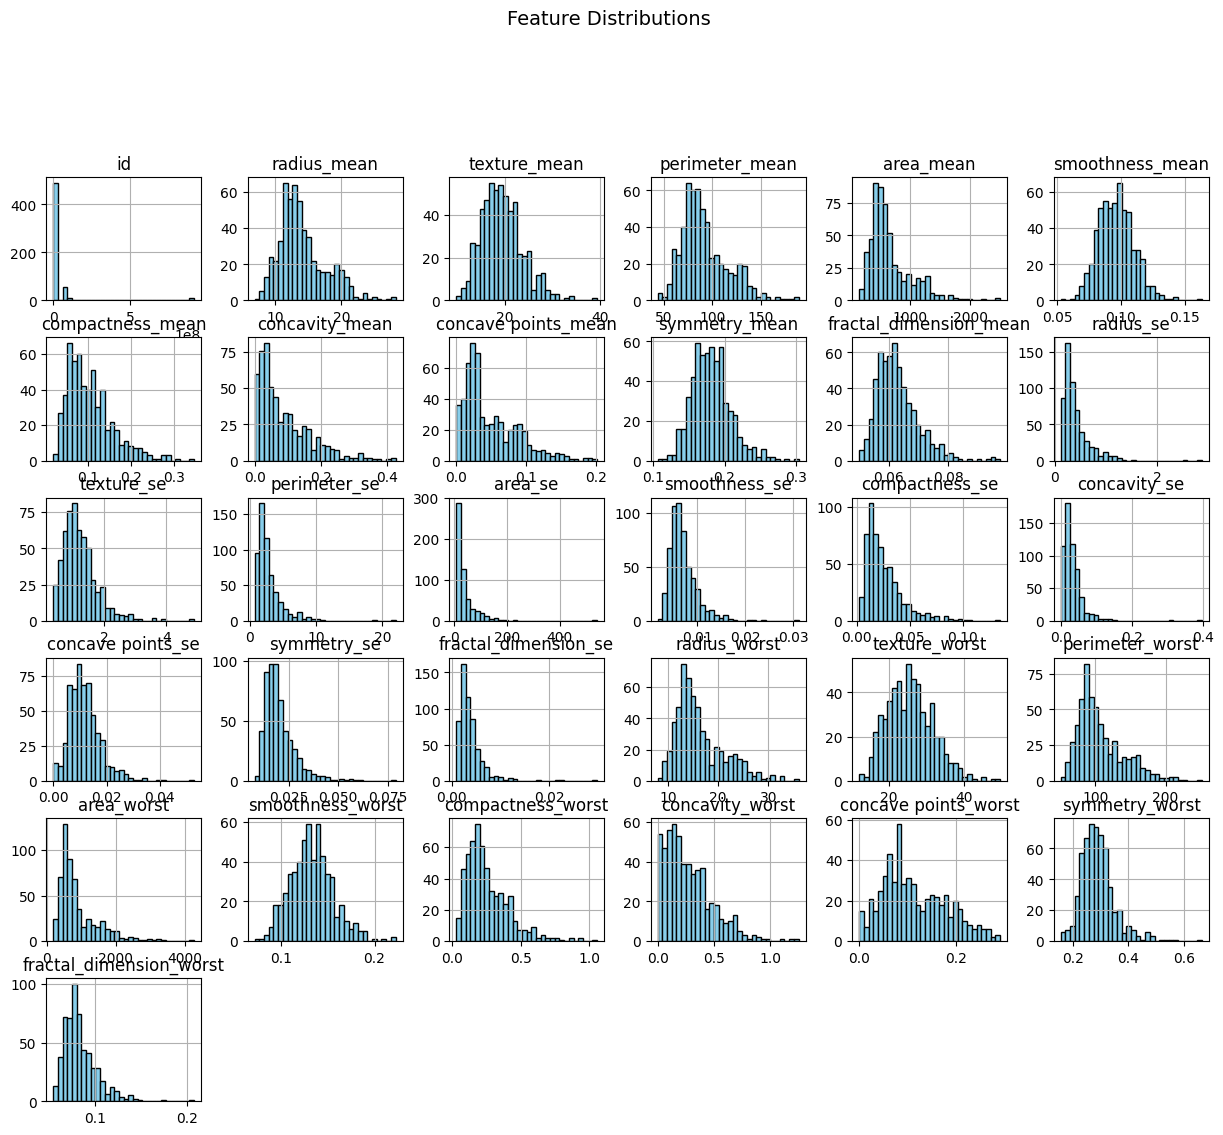

In [20]:
import matplotlib.pyplot as plt

# Get only numerical features
num_features = df.select_dtypes(include=['number']).columns

# Plot histograms
df[num_features].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14, y=1.02)
plt.show()


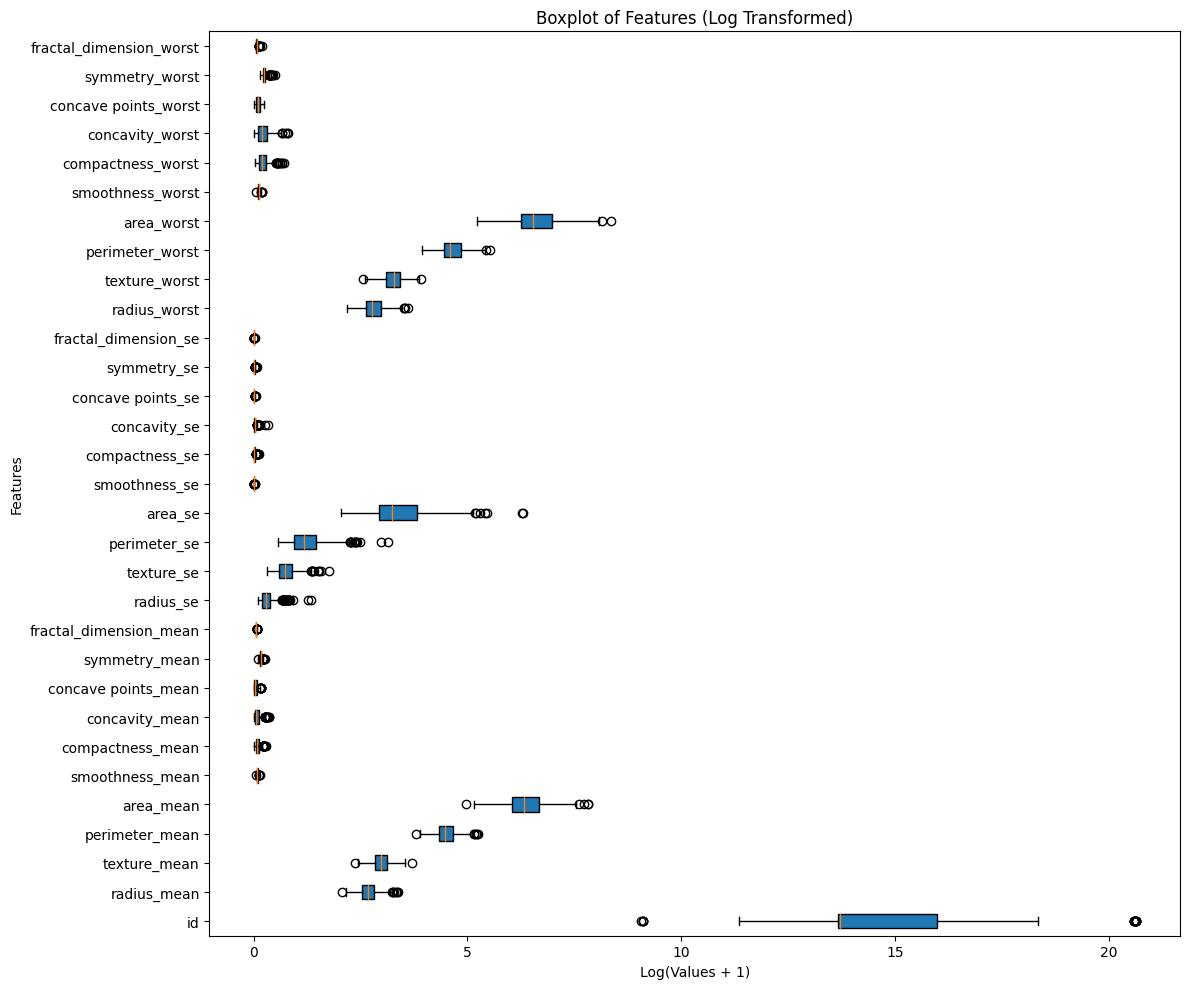

In [24]:
# Log transformation with feature names on y-axis
plt.figure(figsize=(12, 10))  # Taller figure to accommodate feature names
plt.boxplot(np.log1p(df[num_features].values), 
            vert=False,  # Horizontal orientation
            patch_artist=True,
            labels=num_features)  # Use actual feature names as labels

plt.title("Boxplot of Features (Log Transformed)")
plt.xlabel("Log(Values + 1)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## **6️⃣ Correlation Between Features**  
- Use correlation analysis to detect relationships between features.  
- Identify **highly correlated features** that may be redundant.  

/tmp/ipykernel_8128/2754633845.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


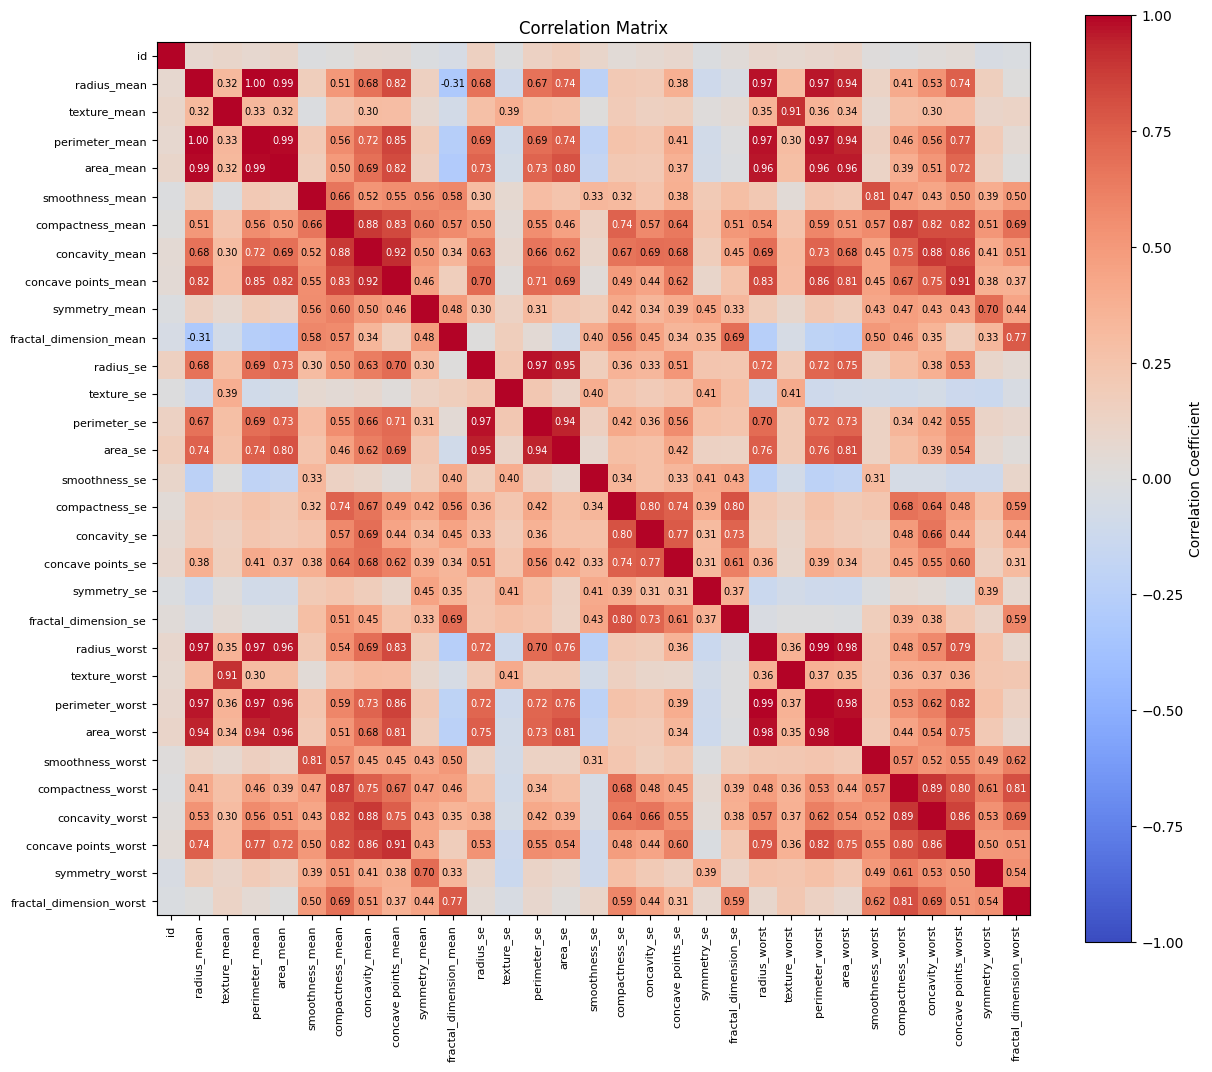

In [27]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create figure with adequate spacing
plt.figure(figsize=(14, 12))

# Plot the heatmap
im = plt.imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient')

# Add feature names with better spacing
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)

# Adjust font size if needed
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Only add text for correlations above a certain threshold to reduce clutter
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        # Only show text for significant correlations
        if abs(corr_matrix.iloc[i, j]) > 0.3 and i != j:  # Skip diagonal and weak correlations
            text = plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                           ha="center", va="center", 
                           color="black" if abs(corr_matrix.iloc[i, j]) < 0.7 else "white",
                           fontsize=7)

plt.title("Correlation Matrix")

# Add more margins and spacing
plt.tight_layout(pad=2.0)
plt.subplots_adjust(bottom=0.2, left=0.2)

plt.show()

# Summary of Data Exploration Findings

Based on your analysis, here are the key findings from your data exploration:

1. **Class Imbalance:**
   * The dataset shows mild imbalance with 62.2% benign and 37.8% malignant cases
   * This level of imbalance may impact model performance but isn't severe enough to require extensive resampling techniques

2. **Outliers:**
   * Limited outliers detected, primarily in `perimeter_se` and `area_se` variables
   * The outlier impact appears minimal and concentrated in specific features

3. **Feature Redundancy:**
   * Several groups of highly correlated features were identified:
      * `radius_mean`, `perimeter_mean`, and `area_mean` (correlation 0.99-1.00)
      * `radius_worst`, `perimeter_worst`, and `area_worst` (correlation 0.94-0.98)
      * `concave points_mean` and `concavity_mean` (correlation 0.92)
      * `radius_se`, `perimeter_se`, and `area_se` (correlation 0.94-0.97)

4. **Feature Removal Candidates:**
   * The `ID` column should be dropped as it has no predictive value
   * From each highly correlated group, consider keeping only one representative feature

These findings suggest that feature selection will be an important preprocessing step before modeling, but data quality issues appear minimal. The mild class imbalance should be considered during model evaluation, possibly through metrics like balanced accuracy or F1-score rather than simple accuracy.

In [38]:
# Drop the 'ID' column
df_cleaned_v0 = df.drop(columns=['id'], axis=1)
df_cleaned_v1=df_cleaned_v0

# Drop redundant features based on the provided correlation analysis
columns_to_drop = [
    'perimeter_mean', 'area_mean',      # Drop 'perimeter_mean' and 'area_mean', keep 'radius_mean'
    'perimeter_worst', 'area_worst',    # Drop 'perimeter_worst' and 'area_worst', keep 'radius_worst'
    'concave points_mean',              # Drop 'concave points_mean', keep 'concavity_mean'
    'perimeter_se', 'area_se'           # Drop 'perimeter_se' and 'area_se', keep 'radius_se'
]

# Apply feature reduction
df_cleaned_v0 = df_cleaned_v0.drop(columns=columns_to_drop)

# Display the cleaned dataset shape
print(f"Cleaned dataset shape: {df_cleaned_v0.shape}")

Cleaned dataset shape: (569, 24)


# **Preprocessing**  

## **Overview**  
In this step, we will preprocess the dataset to make it ready for model training. This includes encoding categorical variables, standardizing numerical features, and splitting the data into training and testing sets. Proper preprocessing ensures that the model receives the data in an optimal format.

## **Key Objectives**  
✅ Encode categorical target variable (`diagnosis`).  
✅ Standardize numerical features.  
✅ Split the data into training and testing sets. 


In [41]:
   from sklearn.preprocessing import LabelEncoder

   # Initialize the label encoder
   label_encoder = LabelEncoder()

   # Encode the 'diagnosis' column
   df_cleaned_v0['diagnosis'] = label_encoder.fit_transform(df_cleaned_v0['diagnosis'])

   # Check the result
   print(df_cleaned_v0['diagnosis'].value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


In [43]:
   from sklearn.preprocessing import StandardScaler

   # Separate features and target variable
   X = df_cleaned_v0.drop(columns=['diagnosis'])  # Features
   y = df_cleaned_v0['diagnosis']  # Target variable

   # Apply StandardScaler to numerical features
   scaler = StandardScaler()
   X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled.shape

(569, 23)

In [45]:
   from sklearn.model_selection import train_test_split

   # Split the data into training and testing sets
   X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

   # Display the shape of the split datasets
   print(f"Training set size: {X_train.shape[0]} rows")
   print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 455 rows
Test set size: 114 rows


#  Training and Testing with Ensemble Learning

## **Overview**  
In this step, we will use ensemble learning methods for model training and evaluation. We start by using **Naive Bayes** as a baseline model and then explore more complex ensemble models like **Random Forest** and **Gradient Boosting**. The goal is to evaluate and compare the performance of these models.

## **Key Objectives**  
✅ Train Naive Bayes as a baseline model.  
✅ Train ensemble models (Random Forest, Gradient Boosting).  
✅ Evaluate the models using appropriate metrics (accuracy, precision, recall, F1-score, ROC-AUC).  
✅ Compare the performance of the models and select the best one.

### **Step 1: Train Naive Bayes as a Baseline Model**  
We start by training a Naive Bayes model, which is a simple yet effective algorithm for classification tasks, especially with high-dimensional data.


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize Naive Bayes model
nb = GaussianNB()

# Train Naive Bayes model
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Evaluate Naive Bayes model
print("Naive Bayes Model Performance:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### **✅ Train Ensemble Models (Random Forest, Gradient Boosting, and more)**  
We will use an ensemble method called **Voting Classifier** to combine the predictions from multiple models. The idea is to take the individual predictions from each model (Naive Bayes, Logistic Regression, SVM, Random Forest, and Gradient Boosting) and combine them to make a final prediction, using either **hard voting** or **soft voting** (probability-based).


In [48]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e4/3c/e3a93bfa7e8693c825df5ec02a40f7ff5f0950e02198b1e85da9315a8d47/xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/11/0c/8c78b7603f4e685624a3ea944940f1e75f36d71bd6504330511f4a0e1557/nvidia_nccl_cu12-2.25.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:02


In [51]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Define individual models
models = {
    'Naive Bayes': GaussianNB(),  # Baseline model
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    
}

## **Step 2: Create a Voting Classifier**

In this step, we combine the individual models using an ensemble method called **Voting Classifier**. We will use **soft voting**, where each model predicts the probabilities of each class, and the final prediction is made based on the majority of predicted probabilities.

### **Code to Create the Voting Classifier**

In [59]:


from sklearn.ensemble import VotingClassifier

# Train individual models
trained_models = {}
print("Training individual models...")
for name, model in models.items():
    model.fit(X_train, y_train)  # Train each model
    trained_models[name] = model  # Store the trained model



Training individual models...


In [60]:
# Create a voting classifier using the trained models
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in trained_models.items()],
                              voting='soft', verbose=True)  # Enable verbosity

# Train the ensemble model
print("\nTraining Voting Classifier...")
voting_clf.fit(X_train, y_train)
print("Voting Classifier training complete!")



Training Voting Classifier...
[Voting] .............. (1 of 5) Processing Naive Bayes, total=   0.0s
[Voting] ...... (2 of 5) Processing Logistic Regression, total=   0.0s
[Voting] ...................... (3 of 5) Processing SVM, total=   0.0s
[Voting] ............ (4 of 5) Processing Random Forest, total=   0.2s
[Voting] ........ (5 of 5) Processing Gradient Boosting, total=   0.3s
Voting Classifier training complete!


In [61]:
# Create a voting classifier using the trained models
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in trained_models.items()],
                              voting='soft', verbose=True)  # Enable verbosity

# Train the ensemble model
print("\nTraining Voting Classifier...")
voting_clf.fit(X_train, y_train)


Training Voting Classifier...
[Voting] .............. (1 of 5) Processing Naive Bayes, total=   0.0s
[Voting] ...... (2 of 5) Processing Logistic Regression, total=   0.0s
[Voting] ...................... (3 of 5) Processing SVM, total=   0.0s
[Voting] ............ (4 of 5) Processing Random Forest, total=   0.2s
[Voting] ........ (5 of 5) Processing Gradient Boosting, total=   0.3s


VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000)),
                             ('SVM', SVC(probability=True)),
                             ('Random Forest', RandomForestClassifier()),
                             ('Gradient Boosting',
                              GradientBoostingClassifier())],
                 verbose=True, voting='soft')

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize dictionary to store results
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}

# Evaluate each model
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Store results
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))
    metrics['ROC-AUC'].append(roc_auc_score(y_test, y_prob) if y_prob is not None else 0)

# Convert to numpy array for easier plotting
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
metrics_array = np.array([metrics[metric] for metric in metric_names])


In [54]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the performance of the ensemble model
print("Ensemble Voting Classifier Performance:")
print(classification_report(y_test, y_pred_voting))

# Accuracy and ROC-AUC for the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_pred_voting)

print(f"Ensemble Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(f"Ensemble Voting Classifier ROC-AUC: {roc_auc_voting:.4f}")

Ensemble Voting Classifier Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Ensemble Voting Classifier Accuracy: 0.9649
Ensemble Voting Classifier ROC-AUC: 0.9581


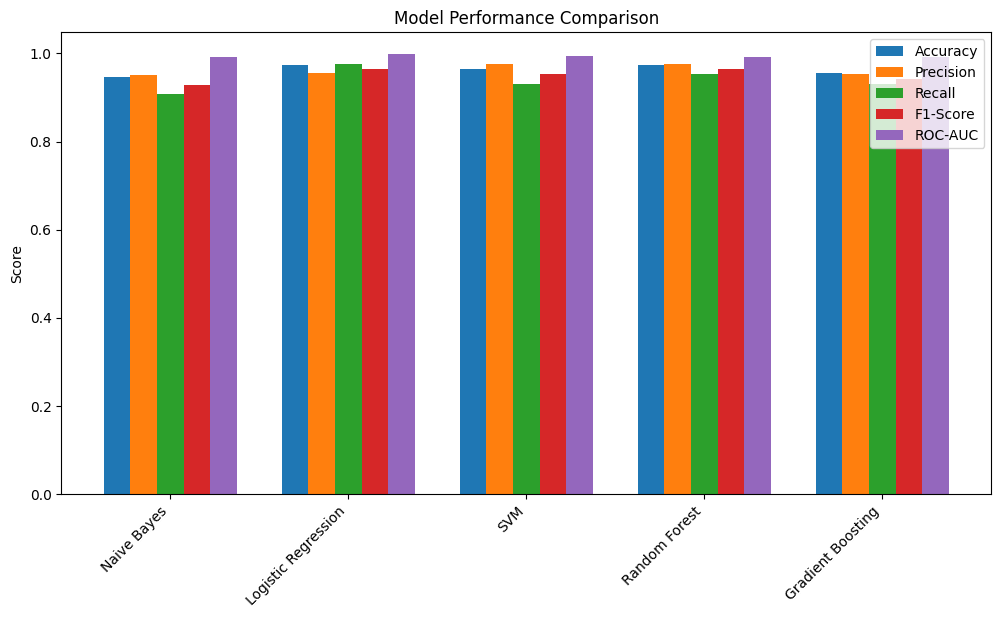

In [63]:
# Set width and positions
x = np.arange(len(metrics['Model']))
width = 0.15  # Bar width

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metric_names):
    ax.bar(x + i * width, metrics_array[i], width, label=metric)

# Labels and formatting
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metrics['Model'], rotation=45, ha="right")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define function to evaluate model on a dataset
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None
    return {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred),
        'ROC-AUC': roc_auc_score(y, y_prob) if y_prob is not None else 0
    }

# Evaluate on training and testing data
train_metrics = evaluate_model(voting_clf, X_train, y_train)
test_metrics = evaluate_model(voting_clf, X_test, y_test)

# Convert to numpy array for plotting
metric_names = list(train_metrics.keys())
train_values = np.array(list(train_metrics.values()))
test_values = np.array(list(test_metrics.values()))


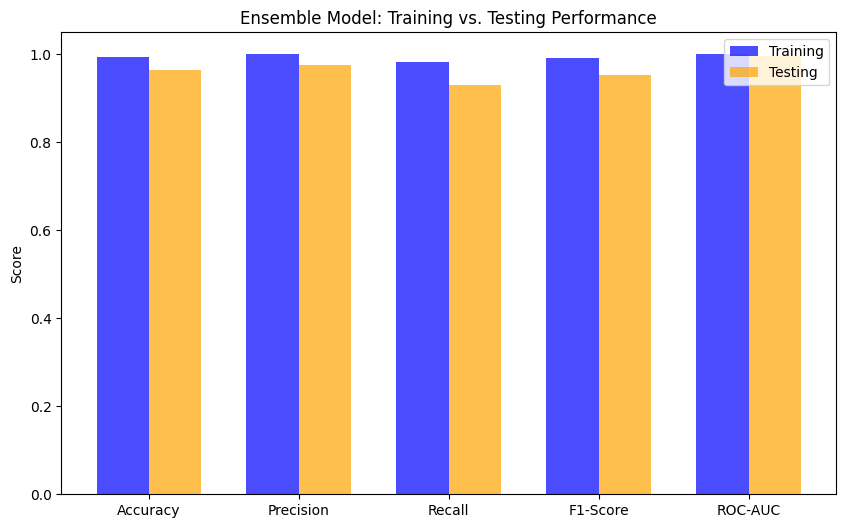

In [66]:
# Set bar width and positions
x = np.arange(len(metric_names))
width = 0.35  

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, train_values, width, label='Training', color='blue', alpha=0.7)
ax.bar(x + width/2, test_values, width, label='Testing', color='orange', alpha=0.7)

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.set_ylabel("Score")
ax.set_title("Ensemble Model: Training vs. Testing Performance")
ax.legend()

plt.show()


In [67]:
from sklearn.metrics import roc_curve, auc

# Get model probabilities for positive class
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Compute final accuracy
final_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))


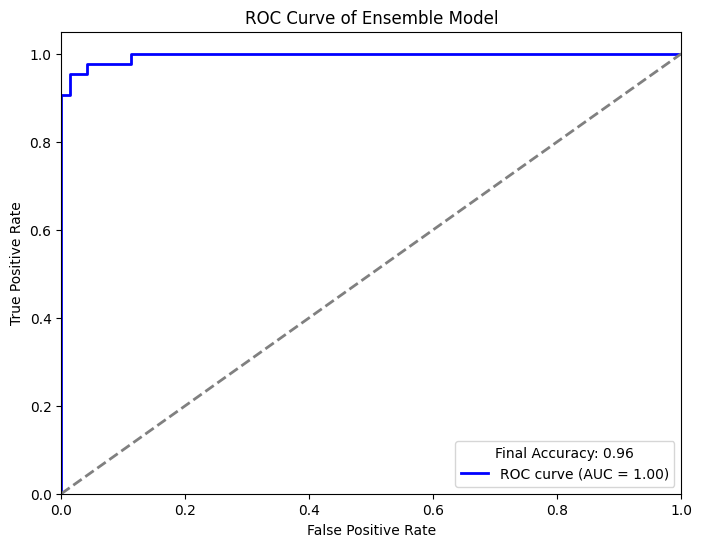

In [68]:
plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal baseline
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Ensemble Model')

# Add legend with final accuracy
plt.legend(loc="lower right", title=f'Final Accuracy: {final_accuracy:.2f}')

plt.show()


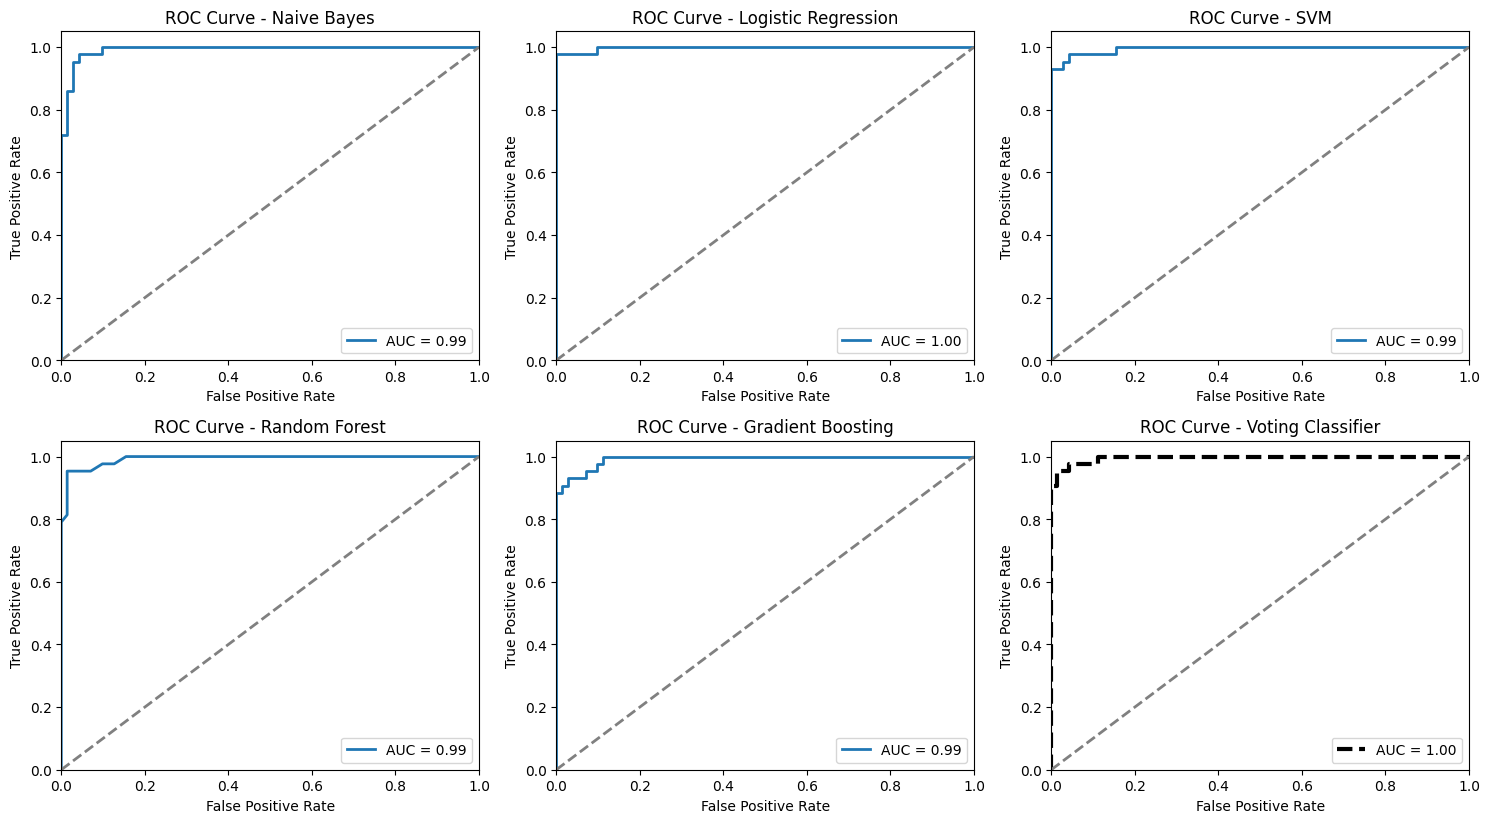

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Set up the figure with subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each model
for idx, (name, model) in enumerate(models.items()):
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)

        # Plot ROC curve
        axes[idx].plot(fpr, tpr, lw=2, label=f"AUC = {auc_score:.2f}")
        axes[idx].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Baseline
        
        # Formatting
        axes[idx].set_xlim([0.0, 1.0])
        axes[idx].set_ylim([0.0, 1.05])
        axes[idx].set_xlabel('False Positive Rate')
        axes[idx].set_ylabel('True Positive Rate')
        axes[idx].set_title(f"ROC Curve - {name}")
        axes[idx].legend(loc="lower right")

# Add Voting Classifier (ensemble model) to the last subplot
y_prob_ensemble = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_ensemble)
auc_score_ensemble = auc(fpr, tpr)
axes[len(models)].plot(fpr, tpr, lw=3, linestyle='--', label=f"AUC = {auc_score_ensemble:.2f}", color='black')
axes[len(models)].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
axes[len(models)].set_xlim([0.0, 1.0])
axes[len(models)].set_ylim([0.0, 1.05])
axes[len(models)].set_xlabel('False Positive Rate')
axes[len(models)].set_ylabel('True Positive Rate')
axes[len(models)].set_title("ROC Curve - Voting Classifier")
axes[len(models)].legend(loc="lower right")

# Remove any extra empty subplots
for i in range(len(models) + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


Generating ROC curves...



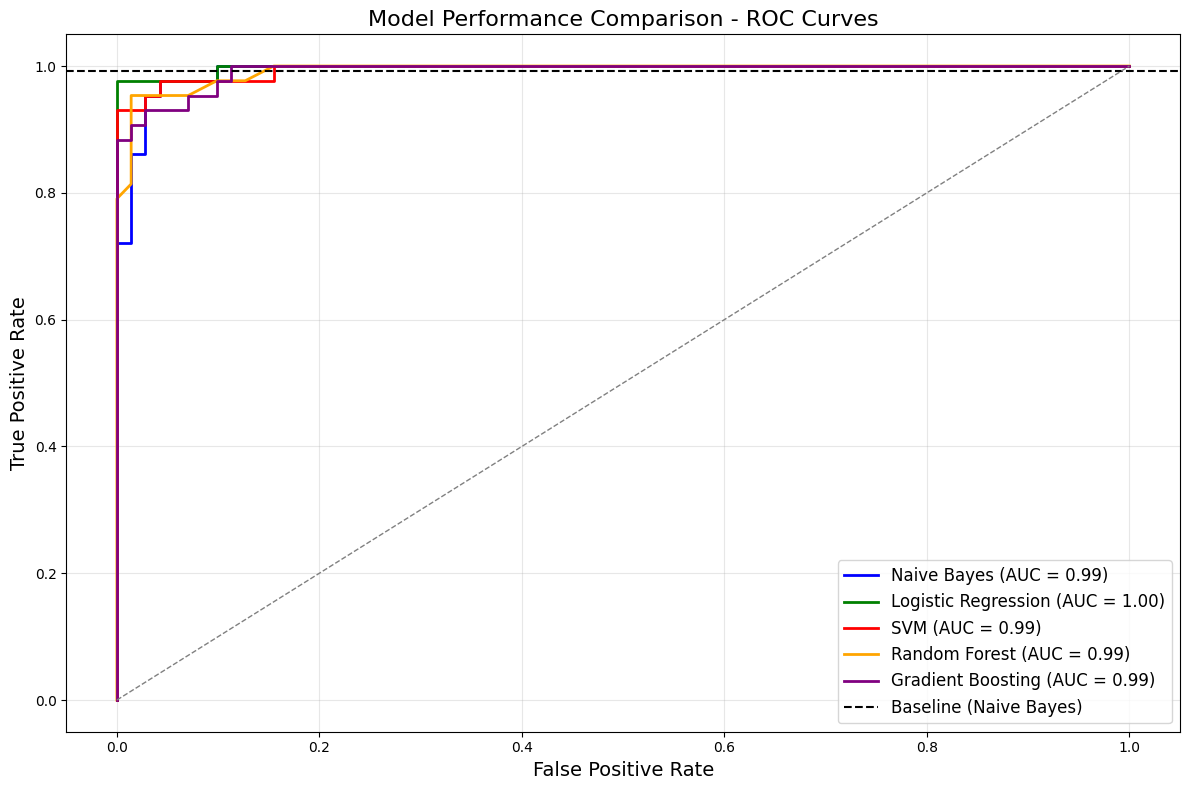

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define colors for each model
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']

# Create the figure for ROC curves
plt.figure(figsize=(12, 8))

# Dictionary to store AUC scores for all models
auc_scores = {}

print("Generating ROC curves...\n")
for idx, (name, model) in enumerate(models.items()):
    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        print(f"Model {name} does not support predict_proba or decision_function. Skipped.")
        continue

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[idx % len(colors)], lw=2,
             label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the baseline (Naive Bayes) for reference if available
if 'Naive Bayes' in auc_scores:
    plt.axhline(y=auc_scores['Naive Bayes'], color='black', linestyle='--', 
                label="Baseline (Naive Bayes)", lw=1.5)

# Configure the legend and axes
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1)  # Diagonal reference line
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Model Performance Comparison - ROC Curves', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the ROC curve plot before displaying it
plt.savefig('ROC.png')

# Display the figure
plt.show()
